# Analysis CodeHealth

In this notebook, we use Turing to analyse completion time for our experimental results

This is the brother of the notebook called `Simulation CodeHealth.ipnyb`.

In [1]:
using Revise

In [2]:
using CSV, DataFrames, Statistics, Distributions, Turing, StatsPlots

In [3]:
using ai_codev_study.Models
using ai_codev_study.Commons

In [4]:
data = CSV.read("../../data/tasks_merged.csv", DataFrame)

Row,dev1,task1.ai,task1.codehealth,task1.coverage,task1.measured_time,task1.estimated_time,task1.entry_demo_4,task1.entry_demo_5,task1.entry_ai_1,task1.entry_ai_2,task1.entry_ai_3,task1.entry_ai_4,task1.entry_ai_5,task1.entry_ai_6,task1.entry_ai_7,task1.entry_ai_8,task1.entry_ai_9,task1.entry_ai_10,task1.exit_uninterrupted,task1.exit_space_1,task1.exit_space_2,task1.exit_space_3,task1.exit_space_4,task1.exit_space_5,task1.exit_space_6,task1.exit_space_7,task1.exit_space_8,task1.exit_space_9,task1.exit_space_10,task2.dev2,task2.treatment,task2.codehealth,task2.coverage,task2.measured_time,task2.estimated_time,task2.exit_uninterrupted,task2.exit_space_1,task2.exit_space_2,task2.exit_space_3,task2.exit_space_4,task2.exit_space_5,task2.exit_space_6,task2.exit_space_7,task2.exit_space_8,task2.exit_space_9,task2.exit_space_10,task1.ai_xp,task1.ai_pref
,String7,Bool,Float64,Float64,Int64,Float64?,String15,String15,Bool,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String15?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String7,String7,Float64,Float64,Float64,Float64?,String15?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Float64?
1,anon126,true,8.34,0.74,3290,missing,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,Yes,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,anon136,ai,8.42,0.73,4773.0,missing,Yes,4.0,4.0,1.0,5.0,5.0,4.0,1.0,2.0,3.0,1.0,5,5.0
2,anon126,true,8.34,0.74,3290,missing,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,Yes,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,anon106,ai,8.07,0.75,15671.0,missing,Yes,5.0,4.0,3.0,1.0,4.0,5.0,5.0,5.0,5.0,2.0,5,5.0
3,anon126,true,8.34,0.74,3290,missing,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,Yes,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,anon037,ai,8.43,0.73,6327.0,missing,Yes,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5,5.0
4,anon126,true,8.34,0.74,3290,missing,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,Yes,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,anon050,ai,8.84,0.9,94967.0,19800.0,No,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5,5.0
5,anon094,true,8.5,0.71,6601,missing,Professional,Advanced,true,5.0,5.0,5.0,5.0,5.0,4.0,1.0,3.0,4.0,"Yes, but breaks",4.0,4.0,5.0,1.0,5.0,5.0,5.0,4.0,4.0,2.0,anon005,ai,8.64,0.71,391708.0,5400.0,Yes,5.0,3.0,4.0,2.0,4.0,3.0,3.0,4.0,5.0,3.0,5,4.5
6,anon126,true,8.88,0.91,462632,10800.0,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,No,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,anon136,ai,8.42,0.73,4773.0,missing,Yes,4.0,4.0,1.0,5.0,5.0,4.0,1.0,2.0,3.0,1.0,5,5.0
7,anon126,true,8.88,0.91,462632,10800.0,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,No,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,anon106,ai,8.07,0.75,15671.0,missing,Yes,5.0,4.0,3.0,1.0,4.0,5.0,5.0,5.0,5.0,2.0,5,5.0
8,anon126,true,8.88,0.91,462632,10800.0,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,No,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,anon037,ai,8.43,0.73,6327.0,missing,Yes,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5,5.0
9,anon126,true,8.88,0.91,462632,10800.0,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,No,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,anon050,ai,8.84,0.9,94967.0,19800.0,No,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,5.0,5,5.0


In [5]:
# We'll do a complete analysis for now

In [6]:
selected_columns = ["task2.codehealth",
        "task1.codehealth",
        "task1.ai", "task1.ai_xp", "task1.entry_demo_4", "task1.entry_demo_5"]

6-element Vector{String}:
 "task2.codehealth"
 "task1.codehealth"
 "task1.ai"
 "task1.ai_xp"
 "task1.entry_demo_4"
 "task1.entry_demo_5"

In [7]:
selected_data = data[!,selected_columns]

Row,task2.codehealth,task1.codehealth,task1.ai,task1.ai_xp,task1.entry_demo_4,task1.entry_demo_5
,Float64,Float64,Bool,Int64,String15,String15
1,8.42,8.34,true,5,Professional,Beginner
2,8.07,8.34,true,5,Professional,Beginner
3,8.43,8.34,true,5,Professional,Beginner
4,8.84,8.34,true,5,Professional,Beginner
5,8.64,8.5,true,5,Professional,Advanced
6,8.42,8.88,true,5,Professional,Beginner
7,8.07,8.88,true,5,Professional,Beginner
8,8.43,8.88,true,5,Professional,Beginner
9,8.84,8.88,true,5,Professional,Beginner


In [8]:
complete_case_data = dropmissing(selected_data)

Row,task2.codehealth,task1.codehealth,task1.ai,task1.ai_xp,task1.entry_demo_4,task1.entry_demo_5
,Float64,Float64,Bool,Int64,String15,String15
1,8.42,8.34,true,5,Professional,Beginner
2,8.07,8.34,true,5,Professional,Beginner
3,8.43,8.34,true,5,Professional,Beginner
4,8.84,8.34,true,5,Professional,Beginner
5,8.64,8.5,true,5,Professional,Advanced
6,8.42,8.88,true,5,Professional,Beginner
7,8.07,8.88,true,5,Professional,Beginner
8,8.43,8.88,true,5,Professional,Beginner
9,8.84,8.88,true,5,Professional,Beginner


# Model 0, Just comparing the means

This is not supposed to be used as a base (doesn't control for other variables), just it's here for reference.

In [9]:
model_0 = Models.code_health_analysis_gaussian(
    complete_case_data[!,"task1.ai"],
    complete_case_data[!,"task2.codehealth"])

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_gaussian), (:ai_use, :code_health), (), (), Tuple{Vector{Bool}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_gaussian, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], code_health = [8.42, 8.07, 8.43, 8.84, 8.64, 8.42, 8.07, 8.43, 8.84, 8.66  …  8.15, 8.56, 8.62, 8.32, 8.87, 8.39, 8.32, 8.54, 8.59, 8.49]), NamedTuple(), DynamicPPL.DefaultContext())

In [10]:
chain_0 = sample(model_0, NUTS(), MCMCSerial(), 2000, 4)

┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:01
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.4
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:00


Chains MCMC chain (2000×15×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 18.52 seconds
Compute duration  = 15.84 seconds
parameters        = intercept, effect_ai, sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

   intercept    8.4402    0.0302    0.0005   4048.5452   4776.5303    1.0005   ⋯
   effect_ai    0.0425    0.0403    0.0006   4106.8826   4658.2025    1.0011   ⋯
       sigma    0.1778    0.0144    0.0002   5095.2933   4797.6267    1.0007   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0% 

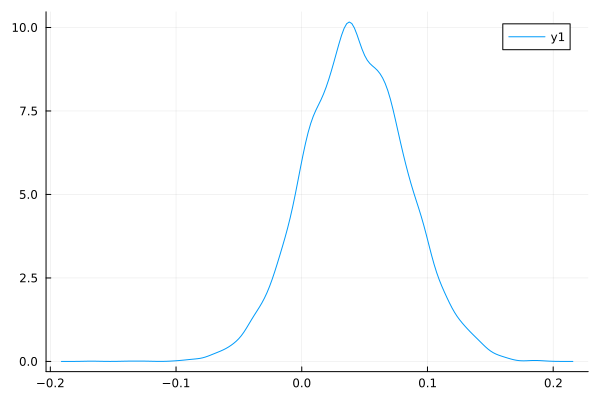

In [11]:
density(chain_0[:effect_ai] |> vec)

In [12]:
Commons.credibility_interval(chain_0[:effect_ai] |> vec, 0.95)

2-element Vector{Float64}:
 -0.04
  0.12

This model infers that AI devs led to slightly better code (-0.03 points to +0.12 points). 

# Model 1

And now, the same with controls, we consider code health has normally distributed residuals.

In [13]:
model_1 = Models.code_health_analysis_with_controls_gaussian(
    complete_case_data[!,"task1.ai"],
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    Commons.center(complete_case_data[!,"task2.codehealth"])
    )

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], code_health = [-0.044303797468355555, -0.3943037974683552, -0.03430379746835577, 0.3756962025316444, 0.17569620253164508, -0.044303797468355555, -0.3943037974683552, -0.03430379746835577, 0.3756962025316444, 0.19569620253164466  …  -0.31430379746835513, 0.09569620253164501, 0.15569620253164373, -0.1443037974683552, 0.40569620253164373, -0.07430379746835492, -0.1443037974683552, 

In [14]:
chain_1 = sample(model_1, NUTS(), MCMCSerial(), 2000, 4)

┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:03


Chains MCMC chain (2000×25×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 29.78 seconds
Compute duration  = 27.14 seconds
parameters        = intercept, effect_ai, sigma_ai_xp, effect_ai_xp_z[1], effect_ai_xp_z[2], effect_ai_xp_z[3], effect_ai_xp_z[4], effect_ai_xp_z[5], sigma_skill, effect_dev1_skill_z[1], effect_dev1_skill_z[2], effect_dev1_skill_z[3], sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
              parameters      mean       std      mcse    ess_bulk    ess_tail ⋯
                  Symbol   Float64   Float64   Float64     Float64     Float64 ⋯

               intercept   -0.0679    0.0742    0.0023   1240.4427   1093.5540 ⋯
               effect_ai    0.0980    0.0676    0.0052    454.6398    121.5856 ⋯
             

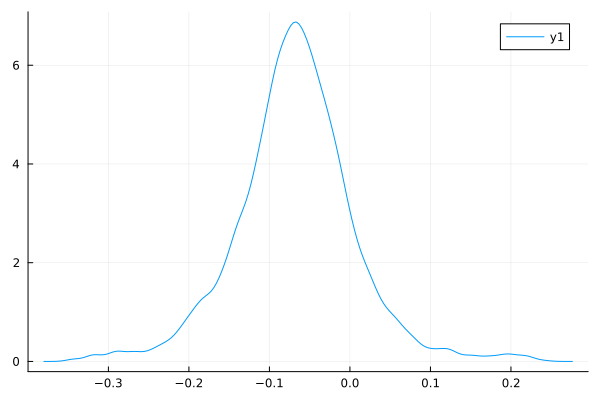

In [15]:
density(vec(chain_1[:intercept]))

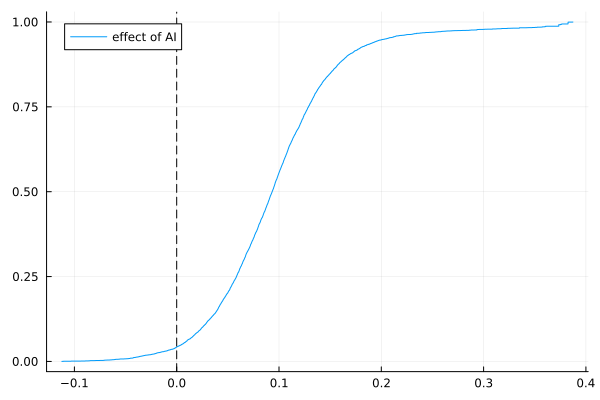

In [16]:
ecdfplot(vec(chain_1[:effect_ai]), label="effect of AI") |> Commons.plotzero!

It seems like using AI has a weak, positive, effect. 

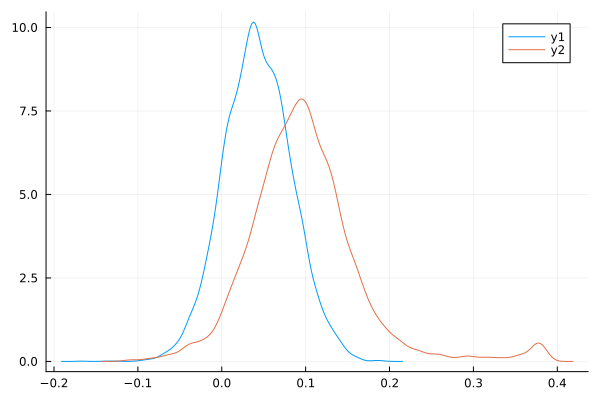

In [17]:
density(vec(chain_0[:effect_ai]))
density!(vec(chain_1[:effect_ai]))

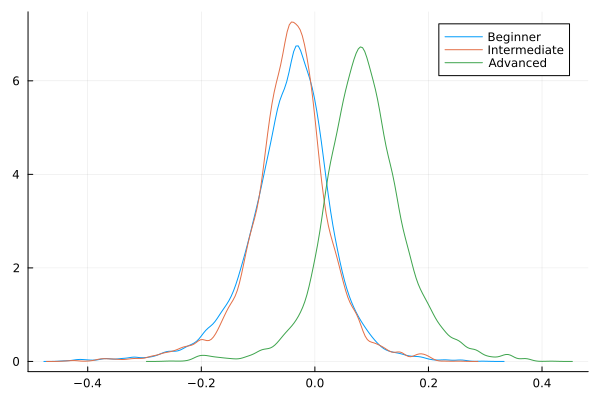

In [18]:
p = plot()

for l in 1:3
    labels = ["Beginner", "Intermediate", "Advanced"]
    samples = chain_1["effect_dev1_skill_z[$l]"].* chain_1["sigma_skill"] |> vec
    density!(p, samples, label=labels[l])
end
p

We can see that the skill of the developer made a difference. Advanced developers improve code-health a but, while beginners and intermediate developers don't

# Model 2: Monotonic effects

We see that dev skill and ai xp are monotonic, if you have Advanced skill, you also have Beginner skill. 
We use a model that uses this information. 

In [19]:
model_11 = Models.code_health_analysis_with_controls_gaussian_2(
    complete_case_data[!,"task1.ai"],
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    Commons.center(complete_case_data[!,"task2.codehealth"]))

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], code_health = [-0.044303797468355555, -0.3943037974683552, -0.03430379746835577, 0.3756962025316444, 0.17569620253164508, -0.044303797468355555, -0.3943037974683552, -0.03430379746835577, 0.3756962025316444, 0.19569620253164466  …  -0.31430379746835513, 0.09569620253164501, 0.15569620253164373, -0.1443037974683552, 0.40569620253164373, -0.07430379746835492, -0.14430379746835

In [20]:
chain_11 = sample(model_11, NUTS(), MCMCSerial(), 4000, 4)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:05
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:06
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:07
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:05


Chains MCMC chain (4000×24×4 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 4
Samples per chain = 4000
Wall duration     = 36.82 seconds
Compute duration  = 34.79 seconds
parameters        = intercept, effect_ai, ladder_ai_xp[1], ladder_ai_xp[2], ladder_ai_xp[3], ladder_ai_xp[4], ladder_ai_xp[5], effect_skill, ladder_skill[1], ladder_skill[2], ladder_skill[3], sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
       parameters      mean       std      mcse     ess_bulk     ess_tail      ⋯
           Symbol   Float64   Float64   Float64      Float64      Float64   Fl ⋯

        intercept   -0.3163    0.2145    0.0039    4865.1822    3157.9161    1 ⋯
        effect_ai    0.1038    0.0447    0.0004   14314.6564   10981.7021    1 ⋯
  ladder_ai_xp[1]    0.2147    0.1681    0.0013   13377.

In [21]:
ess_rhat(chain_1)

ESS/R-hat
              parameters         ess      rhat   ess_per_sec 
                  Symbol     Float64   Float64       Float64 

               intercept   1240.4427    1.0067       45.7138
               effect_ai    454.6398    1.0086       16.7547
             sigma_ai_xp    686.7999    1.0069       25.3105
       effect_ai_xp_z[1]   4315.4090    1.0026      159.0348
       effect_ai_xp_z[2]   5026.4035    1.0016      185.2369
       effect_ai_xp_z[3]   2019.8927    1.0021       74.4386
       effect_ai_xp_z[4]   1209.4446    1.0046       44.5714
       effect_ai_xp_z[5]   1065.7253    1.0056       39.2749
             sigma_skill   1714.7324    1.0011       63.1926
  effect_dev1_skill_z[1]   2347.3227    1.0026       86.5054
  effect_dev1_skill_z[2]   2317.9595    1.0024       85.4232
  effect_dev1_skill_z[3]   1435.8600    1.0043       52.9154
                   sigma   2670.7387    1.0014       98.4241


In [22]:
ess_rhat(chain_11)

ESS/R-hat
       parameters          ess      rhat   ess_per_sec 
           Symbol      Float64   Float64       Float64 

        intercept    4865.1822    1.0004      139.8403
        effect_ai   14314.6564    1.0003      411.4471
  ladder_ai_xp[1]   13377.5040    1.0001      384.5105
  ladder_ai_xp[2]   12794.5438    1.0002      367.7544
  ladder_ai_xp[3]   13276.4033    1.0001      381.6045
  ladder_ai_xp[4]   15484.8160    1.0002      445.0811
  ladder_ai_xp[5]   16174.5760    1.0001      464.9069
     effect_skill    4872.2602    1.0004      140.0437
  ladder_skill[1]    5177.4287    1.0006      148.8152
  ladder_skill[2]    8922.8271    1.0002      256.4694
  ladder_skill[3]    5858.6634    1.0005      168.3959
            sigma   14591.3249    1.0000      419.3994


It seems the second models samples better.

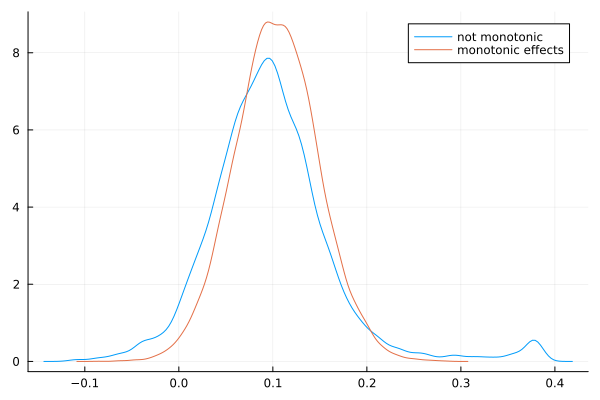

In [23]:
density(vec(chain_1[:effect_ai]), label="not monotonic")
density!(vec(chain_11[:effect_ai]), label="monotonic effects")

The two models seem to agree.

In [24]:
generated = generated_quantities(model_11, chain_11) |> vec;
effects_ai = map(t -> t[:effect_ai_xp], generated)
effects_skill = map(t -> t[:effect_dev1_skill], generated)

16000-element Vector{Vector{Float64}}:
 [0.5124604952172654, 0.5295391241612776, 0.6191263662633901]
 [0.46202359241051955, 0.46385845789488833, 0.5646461106187658]
 [0.02104417580111888, 0.09896749214312978, 0.2974708506951802]
 [0.008804976988460222, 0.020297542711556014, 0.03483646794770987]
 [0.00927525066182589, 0.029663633322290984, 0.05531268354318455]
 [0.29611056873494573, 0.31377938642394415, 0.43088543088050935]
 [0.20688887459224184, 0.23686779109063624, 0.3863809546546707]
 [0.2357031615331056, 0.30731443056211305, 0.40063460000297646]
 [0.3200466520113443, 0.324722499728392, 0.4814318598415683]
 [0.028988182445624632, 0.10910905967777121, 0.17728117598596935]
 [0.023082007132442527, 0.11097860868986062, 0.21805968023703654]
 [0.044516979132995196, 0.046915208204893505, 0.22462872396601496]
 [0.06768629907640909, 0.1435327247038667, 0.24375203347469115]
 ⋮
 [0.002184912041234557, 0.01661443332039868, 0.15800060109342484]
 [0.006548706096801762, 0.06515281654254525, 0.18773

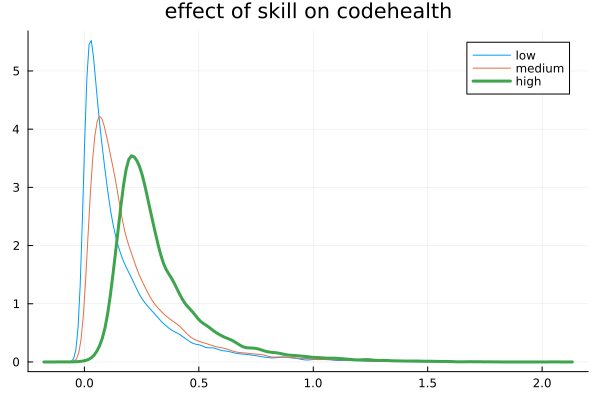

In [25]:
density([v[1] for v in effects_skill], label="low", title="effect of skill on codehealth")
density!([v[2] for v in effects_skill], label="medium")
density!([v[3] for v in effects_skill], label="high", lw=3)

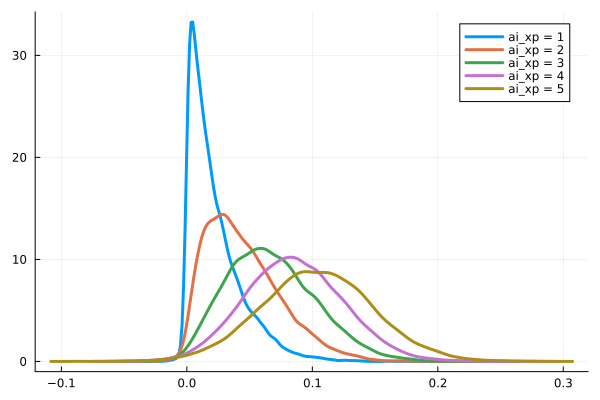

In [26]:
p = plot() 

for ai_xp in 1:5
    density!(p, [v[ai_xp] for v in effects_ai],
        label="ai_xp = $ai_xp",
        lw=3)
end
p

In [27]:
savefig(p, "effect_ai_code_health.pdf")

"/home/noric/Dev/ai-assistants-rct-emse-2025/bayesian/notebooks/effect_ai_code_health.pdf"

In [28]:
for ai_xp in 1:5
    println(Commons.posterior_summary([v[ai_xp] for v in effects_ai]))
end

(mean = 0.02, interval_95 = [0.0, 0.08])
(mean = 0.04, interval_95 = [0.0, 0.11])
(mean = 0.07, interval_95 = [0.01, 0.14])
(mean = 0.09, interval_95 = [0.01, 0.16])
(mean = 0.1, interval_95 = [0.02, 0.19])


We can see that for low skill, the effect of AI is insignificant, but as skill increases, the effect increases too. 

In [29]:
Commons.credibility_interval(chain_11[:effect_ai], 0.9)

2-element Vector{Float64}:
 0.03
 0.18

In [30]:
effect_skill_m = reduce(hcat, effects_skill)

effect_skill = effect_skill_m[3,:] .- effect_skill_m[1,:]

Commons.posterior_summary(effect_skill)

(mean = 0.17, interval_95 = [0.07, 0.26])

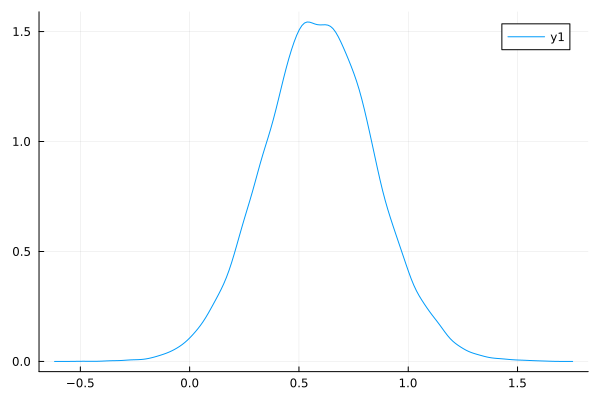

In [35]:
# In standard deviations? 
chain_11[:effect_ai] ./ std(complete_case_data[!,"task2.codehealth"]) |> 
    vec |> density

Approx 0.5 standard deviations!

# Model comparison

Where we compare the model with independent effects and monotonic effects.

In [36]:
model_0_predict = Models.code_health_analysis_gaussian(
    complete_case_data[!,"task1.ai"],
    similar(complete_case_data[!,"task2.codehealth"], Missing))

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_gaussian), (:ai_use, :code_health), (), (), Tuple{Vector{Bool}, Vector{Missing}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_gaussian, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], code_health = [missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  missing, missing, missing, missing, missing, missing, missing, missing, missing, missing]), NamedTuple(), DynamicPPL.DefaultContext())

In [37]:
model_0_coords = (person=1:nrow(complete_case_data),)

model_0_dims = (codehealth=(:person,),)

model_0_data = (;codehealth=complete_case_data[!,"task2.codehealth"]);

In [38]:
model_0_inference = Commons.inference_data(
    model_0, model_0_predict, 
    coords=model_0_coords,
    dims=model_0_dims, 
    data=model_0_data)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:00


InferenceData with groups:
  > posterior
  > posterior_predictive
  > log_likelihood
  > sample_stats
  > prior
  > prior_predictive
  > sample_stats_prior
  > observed_data

In [39]:
model_1_predict = Models.code_health_analysis_with_controls_gaussian(
    complete_case_data[!,"task1.ai"],
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    similar(complete_case_data[!,"task2.codehealth"], Missing))

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Missing}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], code_health = [missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  missing, missing, missing, missing, missing, missing, missing, missing, missing, missing], prior_effect_ai = Normal{Float64}(μ=0.0, σ=1.0)), NamedTuple(), DynamicPPL.DefaultContext())

In [40]:
model_1_coords = (ai_xp=[1, 2, 3, 4, 5],
                  dev1_skill=[1,2,3],
                  person=1:nrow(complete_case_data))

model_1_dims = (effect_ai_xp_z=(:ai_xp,), 
                effect_dev1_skill_z=(:dev1_skill,), 
                codehealth=(:person,))
model_1_data = (;codehealth=Commons.center(complete_case_data[!,"task2.codehealth"]));

In [41]:
model_1_inference = Commons.inference_data(
    model_1, model_1_predict, coords=model_1_coords, dims=model_1_dims, data=model_1_data)

┌ Info: Found initial step size
└   ϵ = 0.4
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.25888671875
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:03


InferenceData with groups:
  > posterior
  > posterior_predictive
  > log_likelihood
  > sample_stats
  > prior
  > prior_predictive
  > sample_stats_prior
  > observed_data

In [42]:
model_11_predict = Models.code_health_analysis_with_controls_gaussian_2(
    complete_case_data[!,"task1.ai"],
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    similar(complete_case_data[!,"task2.codehealth"], Missing));

model_11_coords = model_1_coords
model_11_data = model_1_data

model_11_dims = (ladder_ai_xp=(:ai_xp,),
                 ladder_skill=(:dev1_skill,),
                 codehealth=(:person,))

(ladder_ai_xp = (:ai_xp,), ladder_skill = (:dev1_skill,), codehealth = (:person,))

In [43]:
model_11_inference = Commons.inference_data(
    model_11, model_11_predict, 
    coords=model_11_coords, 
    dims=model_11_dims,
    data=model_11_data)

┌ Info: Found initial step size
└   ϵ = 0.4
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:03


InferenceData with groups:
  > posterior
  > posterior_predictive
  > log_likelihood
  > sample_stats
  > prior
  > prior_predictive
  > sample_stats_prior
  > observed_data

In [44]:
using ArviZ

In [45]:
loo(model_11_inference)

PSISLOOResult with estimates
   elpd  elpd_mcse  p  p_mcse 
 3.e+01        7.9  5     1.0

and PSISResult with 1000 draws, 4 chains, and 79 parameters
Pareto shape (k) diagnostic values:
                    Count        Min. ESS
 (-Inf, 0.5]  good  79 (100.0%)  1512

In [46]:
compare((means_only=model_0_inference, with_controls=model_1_inference, monotonic=model_11_inference))

┌ Warning: 1 parameters had Pareto shape values 0.7 < k ≤ 1. Resulting importance sampling estimates are likely to be unstable.
└ @ PSIS ~/.julia/packages/PSIS/4tW5l/src/core.jl:373


,rank,elpd,elpd_mcse,elpd_diff,elpd_diff_mcse,weight,p,p_mcse
monotonic,1,3.e+01,7.9,0,0.0,0.87,5,1.0
with_controls,2,3.e+01,7.8,1,1.2,0.00,6,1.4
means_only,3,2.e+01,6.4,5,3.6,0.13,3,0.54


The model with monotonic effects gives the best predictions. 

# Comparison with task1

In [47]:
model_11_task1 = Models.code_health_analysis_with_controls_gaussian_2(
    complete_case_data[!,"task1.ai"],
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    Commons.center(complete_case_data[!,"task1.codehealth"]))

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], code_health = [-0.020886075949366756, -0.020886075949366756, -0.020886075949366756, -0.020886075949366756, 0.1391139240506334, 0.5191139240506342, 0.5191139240506342, 0.5191139240506342, 0.5191139240506342, -0.020886075949366756  …  -0.1308860759493662, 0.04911392405063353, 0.04911392405063353, -0.14088607594936597, 0.1891139240506341, -0.08088607594936725, -0.09088607594936

In [48]:
chain_11_task1 = sample(model_11_task1, NUTS(), MCMCSerial(), 4000, 4)

┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:05
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:08
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:06
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:05


Chains MCMC chain (4000×24×4 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 4
Samples per chain = 4000
Wall duration     = 26.7 seconds
Compute duration  = 26.31 seconds
parameters        = intercept, effect_ai, ladder_ai_xp[1], ladder_ai_xp[2], ladder_ai_xp[3], ladder_ai_xp[4], ladder_ai_xp[5], effect_skill, ladder_skill[1], ladder_skill[2], ladder_skill[3], sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
       parameters      mean       std      mcse     ess_bulk     ess_tail      ⋯
           Symbol   Float64   Float64   Float64      Float64      Float64   Fl ⋯

        intercept   -0.1084    0.1972    0.0039    3299.8772    2900.4356    1 ⋯
        effect_ai    0.1311    0.0571    0.0007    7425.5015   10190.9410    1 ⋯
  ladder_ai_xp[1]    0.1270    0.1183    0.0010   12615.6

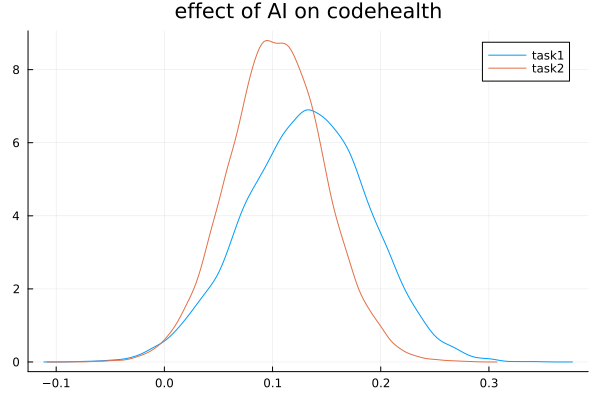

In [49]:
density(chain_11_task1[:effect_ai] |> vec, label="task1", title="effect of AI on codehealth")
density!(chain_11[:effect_ai] |> vec, label="task2")

Is seems AI had a slightly stronger effect in task 1 than in task 2. 

# Average Treatment Effect

In this section, we look at the average treatment effect between using AI or not. 

To do this, we: 

1. Make predictions using our model, for AI=true, and AI=false, keeping all other coveriates.
2. Predictions have uncertainty, and we calculate the difference between predictions for the same dev (ai vs non-ai)
3. Then we look at the mean of all the differences 

In [50]:
model_all_ai = Models.code_health_analysis_with_controls_gaussian_2(
    repeat([true], nrow(complete_case_data)), # ALL AI
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    similar(complete_case_data[!,"task1.codehealth"], Missing))

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Missing}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], code_health = [missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  missing, missing, missing, missing, missing, missing, missing, missing, missing, missing], prior_effect_ai = Normal{Float64}(μ=0.0, σ=1.0)), NamedTuple(), DynamicPPL.DefaultContext())

In [51]:
model_no_ai = Models.code_health_analysis_with_controls_gaussian_2(
    repeat([false], nrow(complete_case_data)), # ALL AI
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    similar(complete_case_data[!,"task1.codehealth"], Missing))

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Missing}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2, (ai_use = Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], code_health = [missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  missing, missing, missing, missing, missing, missing, missing, missing, missing, missing], prior_effect_ai = Normal{Float64}(μ=0.0, σ=1.0)), NamedTuple(), DynamicPPL.DefaultContext())

In [52]:
pred_all_ai = predict(model_all_ai, chain_11)

Chains MCMC chain (4000×79×4 Array{Float64, 3}):

Iterations        = 1:1:4000
Number of chains  = 4
Samples per chain = 4000
parameters        = code_health[1], code_health[2], code_health[3], code_health[4], code_health[5], code_health[6], code_health[7], code_health[8], code_health[9], code_health[10], code_health[11], code_health[12], code_health[13], code_health[14], code_health[15], code_health[16], code_health[17], code_health[18], code_health[19], code_health[20], code_health[21], code_health[22], code_health[23], code_health[24], code_health[25], code_health[26], code_health[27], code_health[28], code_health[29], code_health[30], code_health[31], code_health[32], code_health[33], code_health[34], code_health[35], code_health[36], code_health[37], code_health[38], code_health[39], code_health[40], code_health[41], code_health[42], code_health[43], code_health[44], code_health[45], code_health[46], code_health[47], code_health[48], code_health[49], code_health[50], code_health[5

In [53]:
pred_no_ai = predict(model_no_ai, chain_11)

Chains MCMC chain (4000×79×4 Array{Float64, 3}):

Iterations        = 1:1:4000
Number of chains  = 4
Samples per chain = 4000
parameters        = code_health[1], code_health[2], code_health[3], code_health[4], code_health[5], code_health[6], code_health[7], code_health[8], code_health[9], code_health[10], code_health[11], code_health[12], code_health[13], code_health[14], code_health[15], code_health[16], code_health[17], code_health[18], code_health[19], code_health[20], code_health[21], code_health[22], code_health[23], code_health[24], code_health[25], code_health[26], code_health[27], code_health[28], code_health[29], code_health[30], code_health[31], code_health[32], code_health[33], code_health[34], code_health[35], code_health[36], code_health[37], code_health[38], code_health[39], code_health[40], code_health[41], code_health[42], code_health[43], code_health[44], code_health[45], code_health[46], code_health[47], code_health[48], code_health[49], code_health[50], code_health[5

In [54]:
diffs = []

for p in 1:79
    diff = vec(pred_all_ai["code_health[$p]"] .- pred_no_ai["code_health[$p]"])
    append!(diffs, [diff])
end

In [55]:
# 1 row per MCMC sample, 1 column per person. 
treatment_effects = reduce(hcat, diffs)

16000×79 Matrix{Float64}:
  0.0381954    0.474506    -0.136321    …  -0.0163655   -0.00545604
  0.0562497    0.0250316    0.107592        0.248867     0.094157
  0.440138     0.00920403   0.0789064      -0.131072     0.0801198
  0.067237    -0.264836     0.138658       -0.196756     0.140149
  0.273355     0.181059     0.415542       -0.094966     0.158795
 -0.224406     0.0186565   -0.149071    …   0.155317    -0.0700769
 -0.00871857   0.0569789    0.365952        0.0867082    0.0794492
  0.0550432   -0.0245317   -0.469375        0.180925     0.216595
  0.25283      0.185078     0.189925       -0.206742     0.452802
 -0.155173     0.465234    -0.0331808       0.267094     0.0907731
 -0.0697925   -0.357759     0.145417    …  -0.193348     0.169681
  0.292431    -0.0300126    0.303792        0.00379998  -0.225521
 -0.135795     0.251338     0.0119446       0.0531264   -0.586071
  ⋮                                     ⋱               
  0.643082     0.151541     0.293148       -0.0295799

In [56]:
# Average treatment effect (one ATE per MCMC sample)
ate = mean(treatment_effects, dims=2);

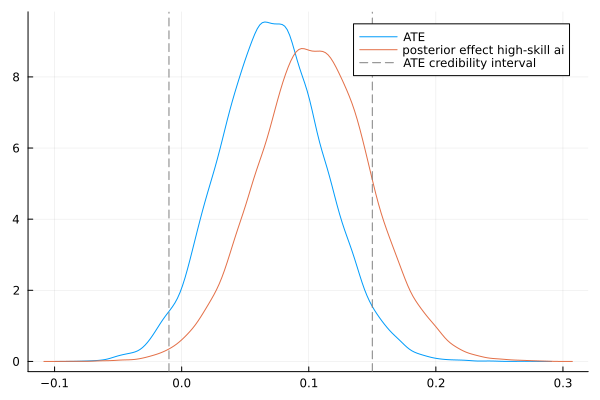

In [57]:
density(ate, label="ATE")
density!(vec(chain_11[:effect_ai]), label="posterior effect high-skill ai")
vline!(credibility_interval(ate, 0.95), color=:gray, style=:dash, label="ATE credibility interval")

The ATE is a little smaller, because the posterior describes the effect of using AI *for developers who have high experience*. In our dataset, a minority didn't report having high experience in AI, so the effect is on average, smaller. 

# Counterfactual plots


In [58]:
model_counterfactual = Models.code_health_analysis_with_controls_gaussian_2(
    [false, false], # AI
    [3, 3], # AI XP
    [1, 3], # SKILL
    [missing, missing]) # CODEHEALTH

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Int64}, Vector{Missing}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2, (ai_use = Bool[0, 0], ai_xp = [3, 3], dev1_skill = [1, 3], code_health = [missing, missing], prior_effect_ai = Normal{Float64}(μ=0.0, σ=1.0)), NamedTuple(), DynamicPPL.DefaultContext())

In [59]:
predictions_counter = predict(model_counterfactual, chain_11)

Chains MCMC chain (4000×2×4 Array{Float64, 3}):

Iterations        = 1:1:4000
Number of chains  = 4
Samples per chain = 4000
parameters        = code_health[1], code_health[2]
internals         = 

Summary Statistics
      parameters      mean       std      mcse     ess_bulk     ess_tail       ⋯
          Symbol   Float64   Float64   Float64      Float64      Float64   Flo ⋯

  code_health[1]   -0.1443    0.1715    0.0014   15911.4221   16030.5816    0. ⋯
  code_health[2]    0.0207    0.1683    0.0013   16092.8058   15916.1362    1. ⋯
                                                               2 columns omitted

Quantiles
      parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
          Symbol   Float64   Float64   Float64   Float64   Float64 

  code_health[1]   -0.4848   -0.2592   -0.1460   -0.0287    0.1907
  code_health[2]   -0.3136   -0.0912    0.0226    0.1324    0.3496


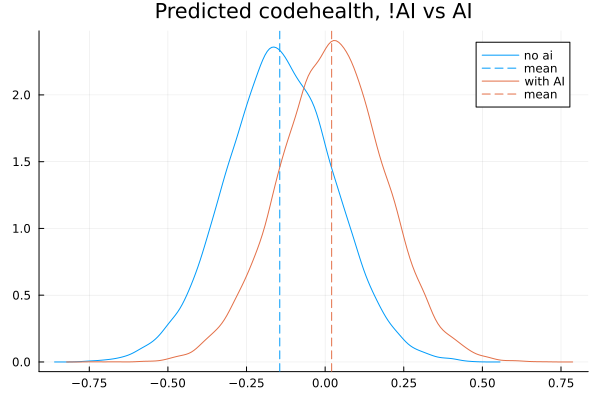

In [60]:
with_ai = vec(predictions_counter["code_health[2]"])
without_ai = vec(predictions_counter["code_health[1]"])

density(without_ai, label="no ai", title="Predicted codehealth, !AI vs AI", color=1)
vline!([mean(without_ai)], color=1, label="mean", style=:dash)
density!(vec(predictions_counter["code_health[2]"]), label="with AI", color=2)
vline!([mean(with_ai)], color=2, label="mean", style=:dash)

In [61]:
predictions_counter["code_health[2]"] .- predictions_counter["code_health[1]"] |> mean

0.1649765673914515

# Sensitivity Analysis

In [64]:
std(complete_case_data[!,"task2.codehealth"])

0.1754385241462807

Realised I wrote 0.5 in the paper, so using that...

In [66]:
model_11_optimistic = Models.code_health_analysis_with_controls_gaussian_2(
    complete_case_data[!,"task1.ai"],
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    Commons.center(complete_case_data[!,"task2.codehealth"]), 
    Normal(0.5, 0.5))

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], code_health = [-0.044303797468355555, -0.3943037974683552, -0.03430379746835577, 0.3756962025316444, 0.17569620253164508, -0.044303797468355555, -0.3943037974683552, -0.03430379746835577, 0.3756962025316444, 0.19569620253164466  …  -0.31430379746835513, 0.09569620253164501, 0.15569620253164373, -0.1443037974683552, 0.40569620253164373, -0.07430379746835492, -0.14430379746835

In [67]:
chain_11_optimistic = sample(model_11_optimistic, NUTS(), MCMCSerial(), 2000, 4)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:05
┌ Info: Found initial step size
└   ϵ = 0.4
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:03


Chains MCMC chain (2000×24×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 18.24 seconds
Compute duration  = 18.05 seconds
parameters        = intercept, effect_ai, ladder_ai_xp[1], ladder_ai_xp[2], ladder_ai_xp[3], ladder_ai_xp[4], ladder_ai_xp[5], effect_skill, ladder_skill[1], ladder_skill[2], ladder_skill[3], sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
       parameters      mean       std      mcse    ess_bulk    ess_tail      r ⋯
           Symbol   Float64   Float64   Float64     Float64     Float64   Floa ⋯

        intercept   -0.3258    0.2194    0.0059   2152.3504   1493.7423    1.0 ⋯
        effect_ai    0.1073    0.0447    0.0005   7389.1492   5480.0933    1.0 ⋯
  ladder_ai_xp[1]    0.2159    0.1682    0.0018   6659.7

In [68]:
model_11_pessimistic = Models.code_health_analysis_with_controls_gaussian_2(
    complete_case_data[!,"task1.ai"],
    complete_case_data[!,"task1.ai_xp"],
    Commons.dev1_skill_to_indexes(complete_case_data[!,"task1.entry_demo_5"]),
    Commons.center(complete_case_data[!,"task2.codehealth"]), 
    Normal(-0.5, 0.5))

DynamicPPL.Model{typeof(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2), (:ai_use, :ai_xp, :dev1_skill, :code_health, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.code_health_analysis_with_controls_gaussian_2, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], code_health = [-0.044303797468355555, -0.3943037974683552, -0.03430379746835577, 0.3756962025316444, 0.17569620253164508, -0.044303797468355555, -0.3943037974683552, -0.03430379746835577, 0.3756962025316444, 0.19569620253164466  …  -0.31430379746835513, 0.09569620253164501, 0.15569620253164373, -0.1443037974683552, 0.40569620253164373, -0.07430379746835492, -0.14430379746835

In [69]:
chain_11_pessimistic = sample(model_11_pessimistic, NUTS(), MCMCSerial(), 2000, 4)

┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:03


Chains MCMC chain (2000×24×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 16.99 seconds
Compute duration  = 16.82 seconds
parameters        = intercept, effect_ai, ladder_ai_xp[1], ladder_ai_xp[2], ladder_ai_xp[3], ladder_ai_xp[4], ladder_ai_xp[5], effect_skill, ladder_skill[1], ladder_skill[2], ladder_skill[3], sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
       parameters      mean       std      mcse    ess_bulk    ess_tail      r ⋯
           Symbol   Float64   Float64   Float64     Float64     Float64   Floa ⋯

        intercept   -0.3222    0.2320    0.0070   1874.2658   1171.9963    1.0 ⋯
        effect_ai    0.0985    0.0451    0.0006   6114.6150   5069.7035    1.0 ⋯
  ladder_ai_xp[1]    0.2144    0.1665    0.0017   7270.9

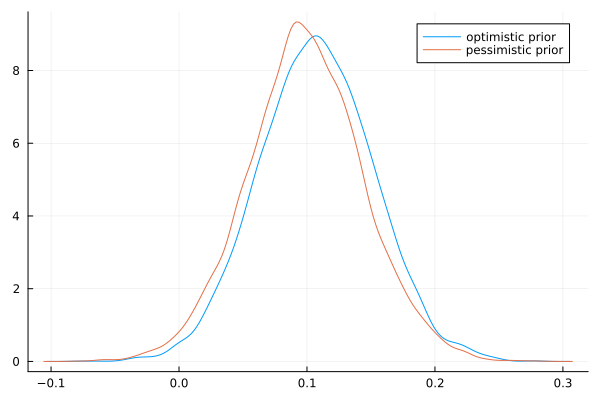

In [70]:
density(chain_11_optimistic[:effect_ai] |> vec, label="optimistic prior")
density!(chain_11_pessimistic[:effect_ai] |> vec, label="pessimistic prior")

The optimistic model and pessimistic models agree.